In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from tqdm import tqdm
import seaborn as sns
import numpy as np

# 데이터 셋 로드

In [51]:
df = pd.read_csv("./datasets/abalone.csv", index_col = 0) # id 부분을 index로
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


# 데이터탐색

## 결측치 제거

In [27]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [28]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [29]:
# 열변수 탐색
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0, 0.5, 'Counts')

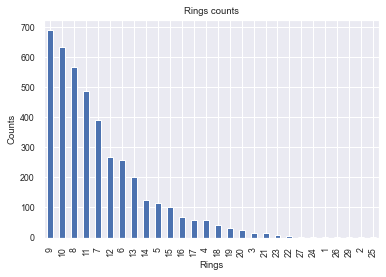

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

label = df['Rings'].value_counts()

label.plot(kind = 'bar')

plt.title("Rings counts")
plt.xlabel("Rings")
plt.ylabel("Counts")

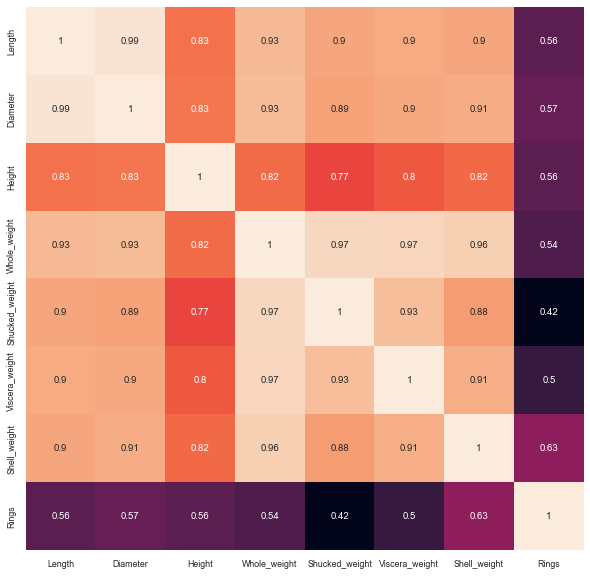

In [31]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# 데이터 전처리

In [52]:
df_Rings = df.copy()

In [53]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_Rings['Sex'] = label_encoder.fit_transform(df_Rings['Sex'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df_Rings['Sex'] = label_encoder.fit_transform(df_Rings['Sex'])

In [54]:
# 구간을 설정하고 라벨을 부여
bins = [0, 8, 10, float('inf')]
labels = [1, 2, 3]

# Rings_categorical 생성
df_Rings['Rings_categorical'] = pd.cut(df['Rings'], bins=bins, labels=labels, right=True).astype(int)

df_Rings

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Rings_categorical
id,,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2


In [69]:
X = df_Rings.drop(['Sex', 'Rings', 'Rings_categorical'], axis = 1)
y = df_Rings['Rings_categorical']

X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [56]:
y

id
0       3
1       1
2       2
3       2
4       1
       ..
4172    3
4173    2
4174    2
4175    2
4176    3
Name: Rings_categorical, Length: 4177, dtype: int32

In [57]:
y.value_counts().sort_index()

1    1407
2    1323
3    1447
Name: Rings_categorical, dtype: int64

In [58]:
#원- 핫 인코딩

Y = pd.get_dummies(y).values
Y

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [71]:
from sklearn.model_selection import train_test_split

# 훈련 데이터와 검증 데이터 나누기
X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,
3141,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100
3521,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125
883,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530
3627,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305
2106,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650
...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535


In [67]:
y_train

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [72]:
# 최적화
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

X_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,-2.888638,-2.775722,-1.410927,-1.630852,-1.557628,-1.589404,-1.655032
1,-2.596339,-2.624022,-1.997555,-1.614648,-1.555397,-1.571292,-1.637150
2,1.120025,1.219028,0.700934,1.118712,1.012390,0.267095,1.513622
3,1.579351,1.168462,1.404887,2.130430,2.616421,2.295660,1.352685
4,0.577185,0.460532,0.348957,0.410813,0.233800,0.253511,0.884183
...,...,...,...,...,...,...,...
3336,1.036511,1.168462,1.052910,1.587606,1.342566,1.267794,1.685287
3337,1.078268,0.915630,-0.003020,0.673110,0.789299,1.222513,0.311965
3338,0.577185,0.409965,0.114306,0.244725,0.443506,0.217287,0.086655
3339,0.827727,0.814497,0.583608,0.585003,0.505972,0.488970,0.551581


In [75]:
y_train.shape[1]

3

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [77]:
X_train = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test = X_test.values.reshape(-1, X_test.shape[1], 1)

# CNN 모델 구축
model = Sequential()

model.add(Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)))  # 필터 개수: 32, 필터 크기: 2
model.add(MaxPooling1D(2))  # Max pooling
model.add(Conv1D(64, 2, activation='relu'))  # 필터 개수: 64
model.add(MaxPooling1D(2))  # Max pooling
model.add(Flatten())  # Flattening
model.add(Dense(100, activation='relu'))  # Fully connected layer
model.add(Dense(Y.shape[1], activation='softmax'))  # 출력 레이어 (클래스 수에 따라)

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\sin010820\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5607 - loss: 0.9329 - val_accuracy: 0.6077 - val_loss: 0.8274
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5890 - loss: 0.8447 - val_accuracy: 0.6136 - val_loss: 0.8280
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6084 - loss: 0.8267 - val_accuracy: 0.6340 - val_loss: 0.8005
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6142 - loss: 0.8320 - val_accuracy: 0.6435 - val_loss: 0.8009
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6313 - loss: 0.7985 - val_accuracy: 0.6507 - val_loss: 0.7858
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6369 - loss: 0.7823 - val_accuracy: 0.6208 - val_loss: 0.8001
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6252 - loss: 0.8035 - val_accuracy: 0.6639 - val_loss: 0.7653
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6335 - loss: 0.7981 - val_accuracy: 0

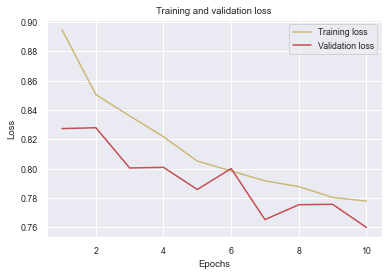

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

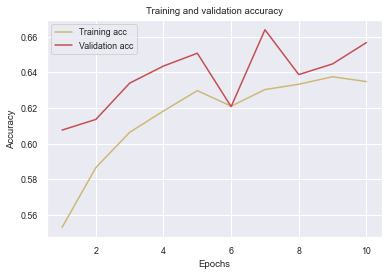

In [80]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [82]:
import tensorflow as tf
# 기존 모델의 loss, accuracy 저장
base_loss,base_accuracy=model.evaluate(X_test, y_test)

# 모델 저장
model_file='./model/Abalone_model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6783 - loss: 0.7594


model saved at  ./model/Abalone_model.h5
Accuracy >65.669858
Base Loss >0.76


# 전이학습

In [83]:
# Base 모델을 로드 (Abalone_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [84]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [85]:
base_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)                    │ (None, 6, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 2, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,059 (43.20 KB)

 Trainable params: 11,059 (43.20 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
df_Sex = df.copy()
df_Sex

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [91]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_Sex['Sex'] = label_encoder.fit_transform(df_Rings['Sex'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df_Sex['Sex'] = label_encoder.fit_transform(df_Rings['Sex'])

df_Sex

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [95]:
X = df_Sex.drop(['Sex', 'Rings'], axis=1)
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [100]:
y = df_Sex['Sex']
y.value_counts().sort_index(ascending=True)

0    1307
1    1342
2    1528
Name: Sex, dtype: int64

In [101]:
Y = pd.get_dummies(y).values
Y

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [102]:
from sklearn.model_selection import train_test_split

# 훈련 데이터와 검증 데이터 나누기
X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,
3141,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100
3521,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125
883,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530
3627,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305
2106,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650
...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535


In [104]:
# 최적화
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

X_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,-2.888638,-2.775722,-1.410927,-1.630852,-1.557628,-1.589404,-1.655032
1,-2.596339,-2.624022,-1.997555,-1.614648,-1.555397,-1.571292,-1.637150
2,1.120025,1.219028,0.700934,1.118712,1.012390,0.267095,1.513622
3,1.579351,1.168462,1.404887,2.130430,2.616421,2.295660,1.352685
4,0.577185,0.460532,0.348957,0.410813,0.233800,0.253511,0.884183
...,...,...,...,...,...,...,...
3336,1.036511,1.168462,1.052910,1.587606,1.342566,1.267794,1.685287
3337,1.078268,0.915630,-0.003020,0.673110,0.789299,1.222513,0.311965
3338,0.577185,0.409965,0.114306,0.244725,0.443506,0.217287,0.086655
3339,0.827727,0.814497,0.583608,0.585003,0.505972,0.488970,0.551581


In [118]:
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [107]:
from tensorflow.keras import models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model

In [114]:
y_test.shape[1]

3

In [115]:
model2 = remove_last_layers(base_model, 1)

model2.add(layers.Dense(Y.shape[1], activation='softmax')) 
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)                    │ (None, 6, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 2, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,756 (42.02 KB)

 Trainable params: 10,756 (42.02 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
base_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)                    │ (None, 6, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 2, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,059 (43.20 KB)

 Trainable params: 11,059 (43.20 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4064 - loss: 1.2051 - val_accuracy: 0.5012 - val_loss: 0.9077
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5304 - loss: 0.8788 - val_accuracy: 0.5227 - val_loss: 0.9040
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5406 - loss: 0.8829 - val_accuracy: 0.5263 - val_loss: 0.8979
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5517 - loss: 0.8747 - val_accuracy: 0.5359 - val_loss: 0.8961
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5566 - loss: 0.8705 - val_accuracy: 0.5383 - val_loss: 0.8947
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5223 - loss: 0.9008 - val_accuracy: 0.5335 - val_loss: 0.9006
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5467 - loss: 0.8830 - val_accuracy: 0.5203 - val_loss: 0.8953
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5441 - loss: 0.8714 - val_accura